In [88]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from final_project.utils import get_evaluated_conversations

from typing import List, Dict

In [2]:
evaluated_conversations: List[Dict] = get_evaluated_conversations()
custom_evaluated_conversations: List[Dict] = get_evaluated_conversations(custom=True)

In [39]:
def order_data(
    evaluated_conversations: List[Dict]
) -> Dict[str, List]:
    
    data: Dict[str, List] = {
        "nice_base": {
            "bleus": [],
            "rouges": [],
            "bertscores": [],
            "task_success_scores": [],
            "coherence_scores": [],
            "pleasentness_scores": [],
            "prediction_scores": [],
        },
        "nice_rag": {
            "bleus": [],
            "rouges": [],
            "bertscores": [],
            "task_success_scores": [],
            "coherence_scores": [],
            "pleasentness_scores": [],
            "prediction_scores": [],
        },
        "annoying_base": {
            "bleus": [],
            "rouges": [],
            "bertscores": [],
            "task_success_scores": [],
            "coherence_scores": [],
            "pleasentness_scores": [],
            "prediction_scores": [],
        },
        "annoying_rag": {
            "bleus": [],
            "rouges": [],
            "bertscores": [],
            "task_success_scores": [],
            "coherence_scores": [],
            "pleasentness_scores": [],
            "prediction_scores": [],
        },
    }
    
    for conv_data in evaluated_conversations:
        persona: str = conv_data["metadata"]["persona"]
        atype: str = conv_data["metadata"]["assistant_type"]

        bleu: float = conv_data["objective_data"]["bleu_score"]
        rouge: float = conv_data["objective_data"]["rouge_score"]
        bertscore: float = conv_data["objective_data"]["bertscore"]["f1"]

        tss: float = conv_data["subjective_data"]["task_success_score"]
        chs: float = conv_data["subjective_data"]["coherence_score"]
        pls: float = conv_data["subjective_data"]["pleasentness_score"]
        pred_s: float = conv_data["subjective_data"]["prediction_score"]

        if persona == "nice" and atype == "base":
            data["nice_base"]["bleus"].append(bleu)
            data["nice_base"]["rouges"].append(rouge)
            data["nice_base"]["bertscores"].append(bertscore)

            data["nice_base"]["task_success_scores"].append(tss)
            data["nice_base"]["coherence_scores"].append(chs)
            data["nice_base"]["pleasentness_scores"].append(pls)
            data["nice_base"]["prediction_scores"].append(pred_s)

        if persona == "nice" and atype == "rag":
            data["nice_rag"]["bleus"].append(bleu)
            data["nice_rag"]["rouges"].append(rouge)
            data["nice_rag"]["bertscores"].append(bertscore)

            data["nice_rag"]["task_success_scores"].append(tss)
            data["nice_rag"]["coherence_scores"].append(chs)
            data["nice_rag"]["pleasentness_scores"].append(pls)
            data["nice_rag"]["prediction_scores"].append(pred_s)

        if persona == "annoying" and atype == "base":
            data["annoying_base"]["bleus"].append(bleu)
            data["annoying_base"]["rouges"].append(rouge)
            data["annoying_base"]["bertscores"].append(bertscore)

            data["annoying_base"]["task_success_scores"].append(tss)
            data["annoying_base"]["coherence_scores"].append(chs)
            data["annoying_base"]["pleasentness_scores"].append(pls)
            data["annoying_base"]["prediction_scores"].append(pred_s)

        if persona == "annoying" and atype == "rag":
            data["annoying_rag"]["bleus"].append(bleu)
            data["annoying_rag"]["rouges"].append(rouge)
            data["annoying_rag"]["bertscores"].append(bertscore)

            data["annoying_rag"]["task_success_scores"].append(tss)
            data["annoying_rag"]["coherence_scores"].append(chs)
            data["annoying_rag"]["pleasentness_scores"].append(pls)
            data["annoying_rag"]["prediction_scores"].append(pred_s)

    return data



In [87]:
data = order_data(evaluated_conversations=evaluated_conversations)
custom_data = order_data(evaluated_conversations=custom_evaluated_conversations)

In [90]:
def calc_avg_subj_scores(
    agent_type: str,
    data: Dict[str, List]
) -> float:

    return (
        np.mean(data[agent_type]["task_success_scores"]),
        np.mean(data[agent_type]["coherence_scores"]),
        np.mean(data[agent_type]["pleasentness_scores"]),
    )

In [91]:
agent_types = ("nice_base", "nice_rag", "annoying_base", "annoying_rag")

In [110]:
def gather_avg_subj_scores(
    data: Dict[str, List],
    agent_types: tuple[str],
) -> tuple[List[str]]:
    avg_task_success_scores: List[float] = []
    avg_coherence_scores: List[float] =[]
    avg_pleasentness_scores: List[float] = []

    for atype in agent_types:
        avg_tss, avg_chs, avg_pls = calc_avg_subj_scores(
            agent_type=atype,
            data=data
        )

        avg_task_success_scores.append(avg_tss)
        avg_coherence_scores.append(avg_chs)
        avg_pleasentness_scores.append(avg_pls)

    return avg_task_success_scores, avg_coherence_scores, avg_pleasentness_scores

In [138]:
def plot_subjective_metrics(
    avg_task_success_scores: List[float],
    avg_coherence_scores: List[float],
    avg_pleasentness_scores: List[float],
    title_subject: str = None,
) -> None:
    
    subj_metrics_means = {
        'avg_task_success_score': avg_task_success_scores,
        'avg_coherence_score': avg_coherence_scores,
        'avg_pleasentness_score': avg_pleasentness_scores,
    }

    x = np.arange(len(agent_types))
    width = 0.2
    multiplier = 0

    fig, ax = plt.subplots(figsize=(12, 5), layout='constrained')

    for attribute, measurement in subj_metrics_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Score')
    ax.set_title(f"Subjective Score Averages ({title_subject})")
    ax.set_xticks(x + width, ["nice_base", "nice_lexical", "annoying_base", "annoying_lexical"])
    ax.legend(loc='upper left', ncols=4)
    ax.set_ylim(0, 1)

    plt.show()

In [139]:
avg_task_success_scores, avg_coherence_scores, avg_pleasentness_scores = gather_avg_subj_scores(
    data=data,
    agent_types=agent_types,
)

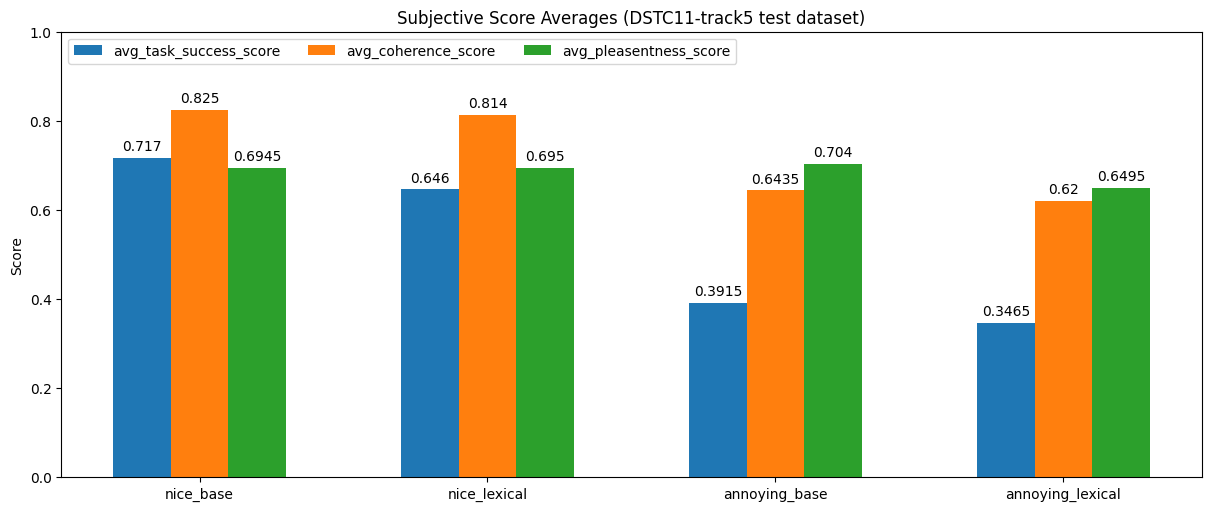

In [140]:
plot_subjective_metrics(
    avg_task_success_scores=avg_task_success_scores,
    avg_coherence_scores=avg_coherence_scores,
    avg_pleasentness_scores=avg_pleasentness_scores,
    title_subject="DSTC11-track5 test dataset"
)

In [141]:
avg_task_success_scores, avg_coherence_scores, avg_pleasentness_scores = gather_avg_subj_scores(
    data=custom_data,
    agent_types=agent_types,
)

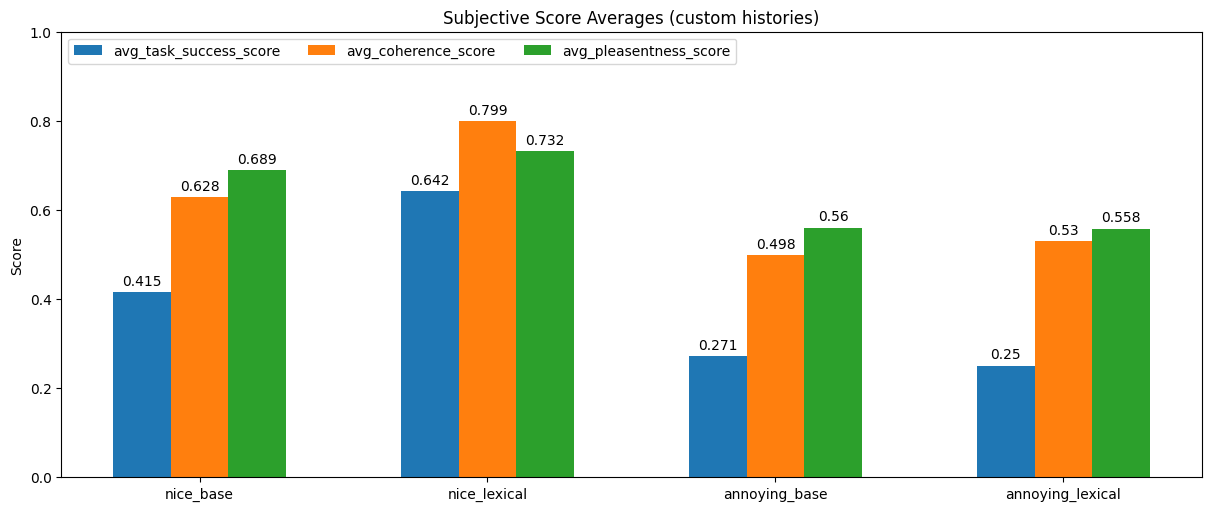

In [142]:
plot_subjective_metrics(
    avg_task_success_scores=avg_task_success_scores,
    avg_coherence_scores=avg_coherence_scores,
    avg_pleasentness_scores=avg_pleasentness_scores,
    title_subject="custom histories"
)

In [143]:
def calc_avg_obj_scores(
    agent_type: str,
    data: Dict[str, List]
) -> float:

    return (
        np.mean(data[agent_type]["bleus"]),
        np.mean(data[agent_type]["rouges"]),
        np.mean(data[agent_type]["bertscores"]),
    )

In [144]:
def gather_avg_obj_scores(
    data: Dict[str, List],
    agent_types: tuple[str],
) -> tuple[List[str]]:
    avg_bleu_scores: List[float] = []
    avg_rouge_scores: List[float] =[]
    avg_bertscores: List[float] = []

    for atype in agent_types:
        avg_bs, avg_rs, avg_berts = calc_avg_obj_scores(
            agent_type=atype,
            data=data
        )

        avg_bleu_scores.append(avg_bs)
        avg_rouge_scores.append(avg_rs)
        avg_bertscores.append(avg_berts)

    return avg_bleu_scores, avg_rouge_scores, avg_bertscores

In [151]:
def plot_objective_metrics(
    avg_bleu_scores: List[float],
    avg_rouge_scores: List[float],
    avg_bertscores: List[float],
    title_subject: str = None,
) -> None:
    
    subj_metrics_means = {
        'avg_bleu_scores': avg_bleu_scores[:2],
        'avg_rouge_scores': avg_rouge_scores[:2],
        'avg_bertscores': avg_bertscores[:2],
    }

    x = np.arange(2)
    width = 0.2
    multiplier = 0

    fig, ax = plt.subplots(figsize=(12, 5), layout='constrained')

    for attribute, measurement in subj_metrics_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Score')
    ax.set_title(f"Objective Score Averages ({title_subject})")
    ax.set_xticks(x + width, ["base_model", "lexical_model"])
    ax.legend(loc='upper left', ncols=4)
    ax.set_ylim(0, 1)

    plt.show()

In [152]:
avg_bleu_scores, avg_rouge_scores, avg_bertscores = gather_avg_obj_scores(
    data=data,
    agent_types=agent_types
)

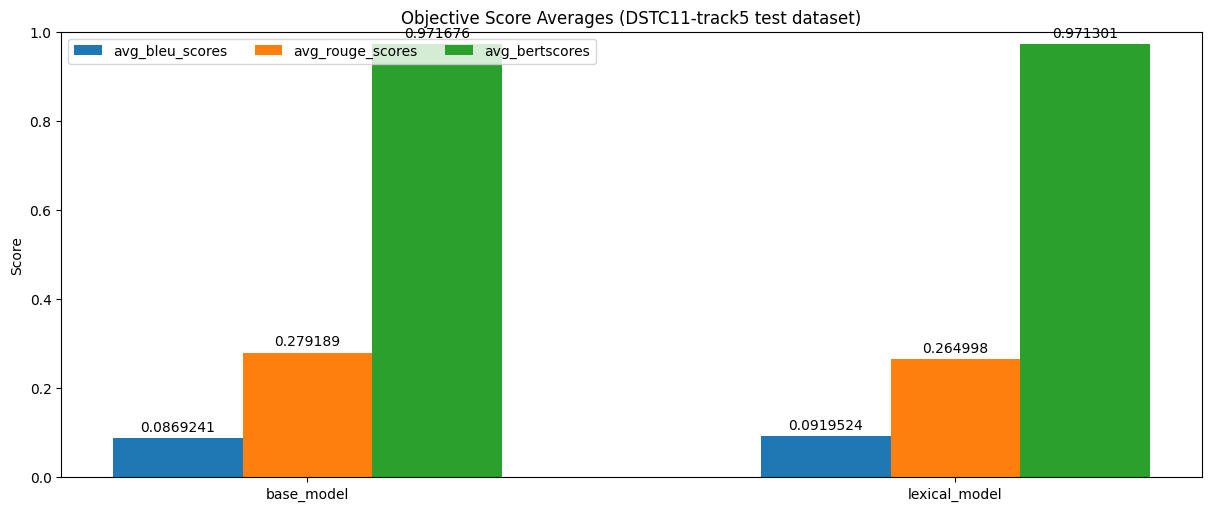

In [153]:
plot_objective_metrics(
    avg_bleu_scores=avg_bleu_scores,
    avg_rouge_scores=avg_rouge_scores,
    avg_bertscores=avg_bertscores,
    title_subject="DSTC11-track5 test dataset",
)

In [154]:
avg_bleu_scores, avg_rouge_scores, avg_bertscores = gather_avg_obj_scores(
    data=custom_data,
    agent_types=agent_types
)

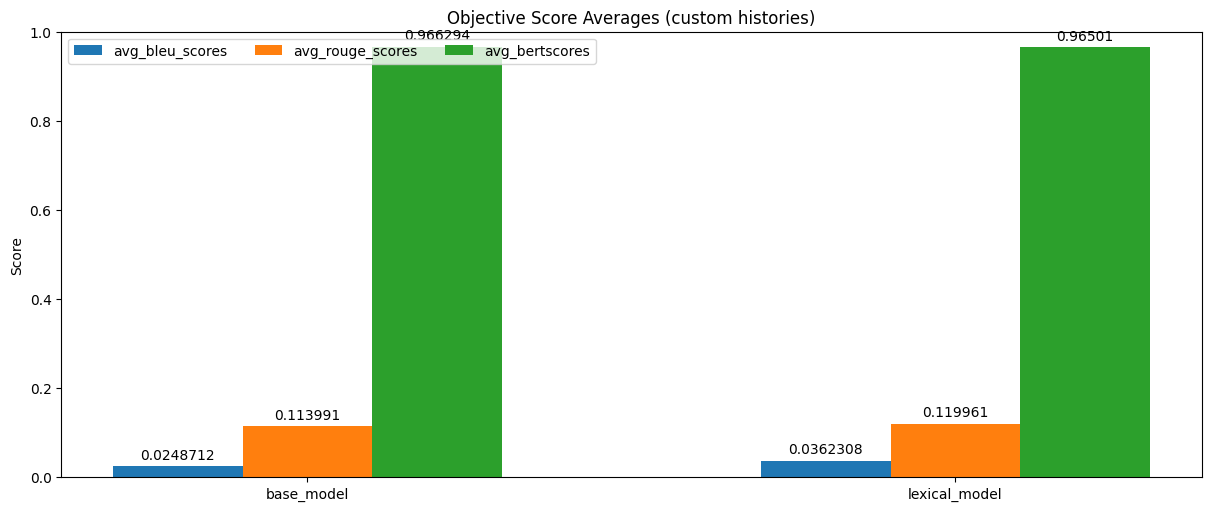

In [155]:
plot_objective_metrics(
    avg_bleu_scores=avg_bleu_scores,
    avg_rouge_scores=avg_rouge_scores,
    avg_bertscores=avg_bertscores,
    title_subject="custom histories",
)

In [156]:
def calc_avg_prediction_scores(
    agent_type: str,
    data: Dict[str, List]
) -> float:

    return (
        np.mean(data[agent_type]["prediction_scores"]),
    )

In [171]:
avg_prediction_scores_base_model = np.mean(data["nice_base"]["prediction_scores"])
avg_prediction_scores_lexical_model = np.mean(data["nice_rag"]["prediction_scores"])

In [172]:
avg_prediction_scores_base_model

np.float64(0.41950000000000004)

In [173]:
avg_prediction_scores_lexical_model

np.float64(0.515)

In [174]:
def plot_prediction_scores(
    avg_prediction_score_base_model: np.float64,
    avg_prediction_score_lexical_model: np.float64,
    title_subject: str = None,
) -> None:

    # Extract scalar score per model
    scores = [avg_prediction_score_base_model, avg_prediction_score_lexical_model]
    labels = ["base_model", "lexical_model"]

    x = np.arange(len(labels))
    width = 0.4

    fig, ax = plt.subplots(figsize=(12, 5), layout="constrained")

    rects = ax.bar(x, scores, width, label="avg_prediction_scores")
    ax.bar_label(rects, padding=3)

    ax.set_ylabel("Score")
    ax.set_title(f"Prediction Score by GPT-5 nano ({title_subject})")
    ax.set_xticks(x, labels)
    ax.set_ylim(0, 1)
    ax.legend()

    plt.show()


In [175]:
avg_prediction_scores = gather_avg_prediction_scores(
    data=data,
    agent_types=agent_types
)

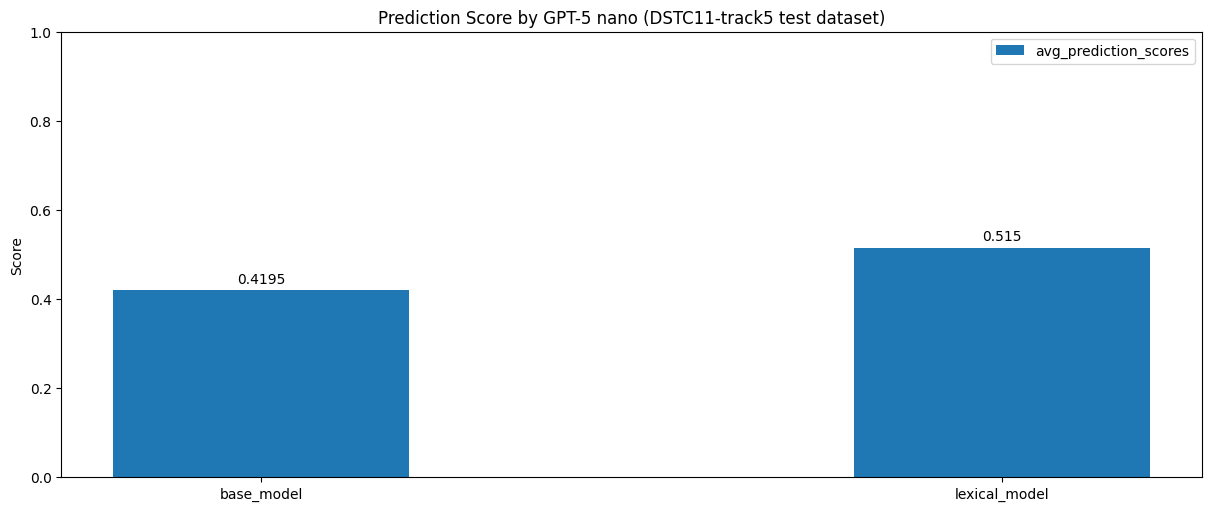

In [177]:
plot_prediction_scores(
    avg_prediction_score_base_model=avg_prediction_scores_base_model,
    avg_prediction_score_lexical_model=avg_prediction_scores_lexical_model,
    title_subject="DSTC11-track5 test dataset",
)

In [181]:
avg_prediction_scores_base_model = np.mean(custom_data["nice_base"]["prediction_scores"])
avg_prediction_scores_lexical_model = np.mean(custom_data["nice_rag"]["prediction_scores"])

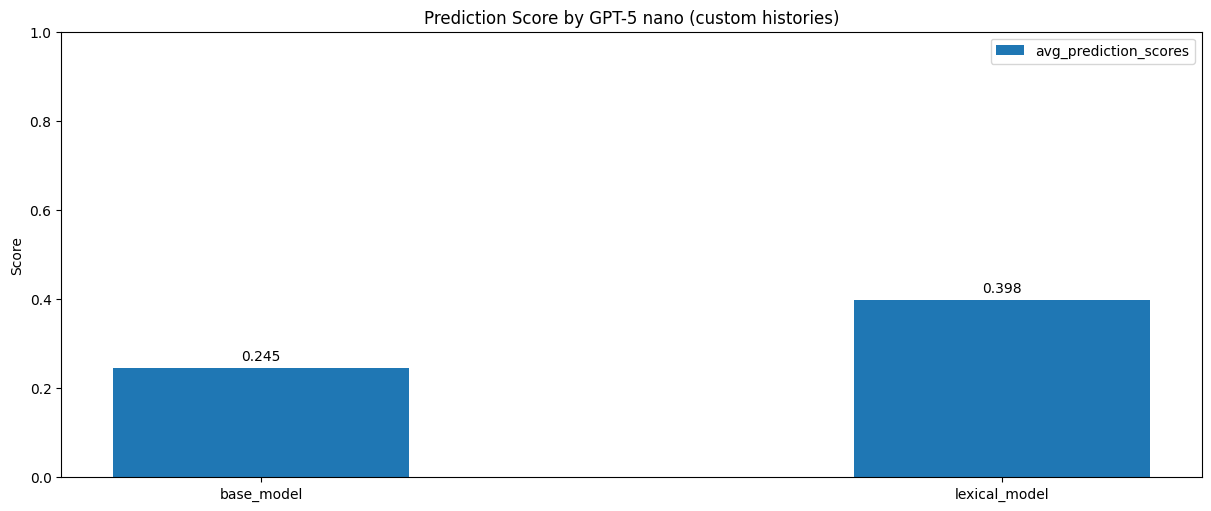

In [182]:
plot_prediction_scores(
    avg_prediction_score_base_model=avg_prediction_scores_base_model,
    avg_prediction_score_lexical_model=avg_prediction_scores_lexical_model,
    title_subject="custom histories",
)